In [254]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
import pandas_profiling

from sklearn.model_selection import train_test_split

# ML libraries to implement models
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

# libraries for metrices
from sklearn.metrics import accuracy_score, explained_variance_score, r2_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler # Libraries for Scaling

from sklearn.model_selection import RandomizedSearchCV #Lib for Randomized Search CV
from sklearn.model_selection import cross_val_score #Lib for Cross Validation

plt.style.use('ggplot')
pd.options.display.float_format = '{:,.4f}'.format
import warnings 
warnings.filterwarnings('ignore');

#### Reading Dataset

In [212]:
df_concrete = pd.read_csv('concrete.csv', sep=',')

#### Starting intial analysis

In [213]:
df_concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3000,212.0000,0.0000,203.5000,0.0000,971.8000,748.5000,28,29.8900
1,168.9000,42.2000,124.3000,158.3000,10.8000,"1,080.8000",796.2000,14,23.5100
2,250.0000,0.0000,95.7000,187.4000,5.5000,956.9000,861.2000,28,29.2200
3,266.0000,114.0000,0.0000,228.0000,0.0000,932.0000,670.0000,28,45.8500
4,154.8000,183.4000,0.0000,193.3000,9.1000,"1,047.4000",696.7000,28,18.2900


In [214]:
df_concrete.shape # There are 1030 rows and 9 column in the dataset


(1030, 9)

In [215]:
df_concrete.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


##### Age is the only integer value, rest of the values are floats.

## 1) Univariate analysis

###### Performing 5 point sumary

In [216]:
df_concrete.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,"1,030.0000","1,030.0000","1,030.0000","1,030.0000","1,030.0000","1,030.0000","1,030.0000","1,030.0000","1,030.0000"
mean,281.1679,73.8958,54.1883,181.5673,6.2047,972.9189,773.5805,45.6621,35.8180
std,104.5064,86.2793,63.9970,21.3542,5.9738,77.7540,80.1760,63.1699,16.7057
min,102.0000,0.0000,0.0000,121.8000,0.0000,801.0000,594.0000,1.0000,2.3300
25%,192.3750,0.0000,0.0000,164.9000,0.0000,932.0000,730.9500,7.0000,23.7100
50%,272.9000,22.0000,0.0000,185.0000,6.4000,968.0000,779.5000,28.0000,34.4450
75%,350.0000,142.9500,118.3000,192.0000,10.2000,"1,029.4000",824.0000,56.0000,46.1350
max,540.0000,359.4000,200.1000,247.0000,32.2000,"1,145.0000",992.6000,365.0000,82.6000


In [217]:
df_concrete.skew().sort_values()

fineagg        -0.2530
coarseagg      -0.0402
water           0.0746
strength        0.4170
cement          0.5095
ash             0.5374
slag            0.8007
superplastic    0.9072
age             3.2692
dtype: float64

### Observations:
###### Most of the columns show right skewness
###### fineagg and coarseagg show left skewness
###### Water and coarseagg are very close to symmetry

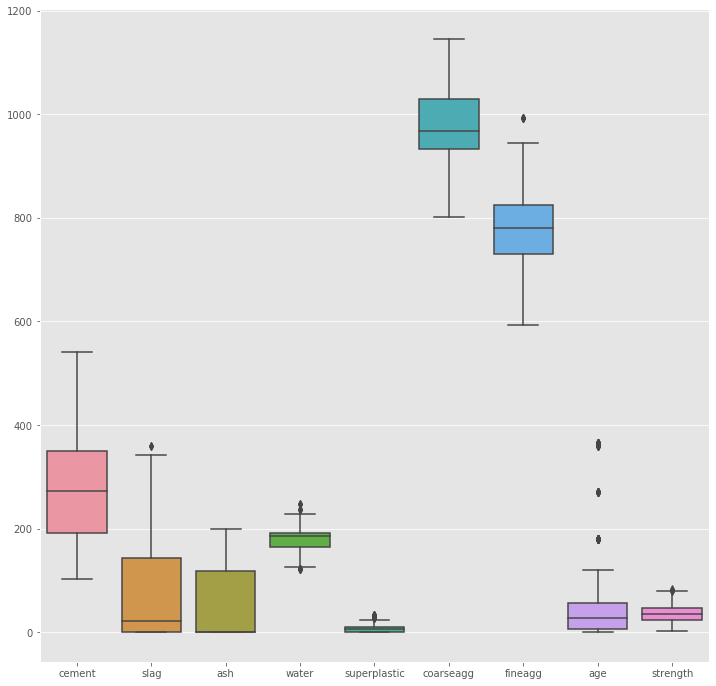

In [218]:
plt.figure(figsize=(12,12))
box = sns.boxplot(data=df_concrete)

### Observation
###### Outliars present in slag, water, superplastic, fineagg and age
###### Target variable strength also has outliars

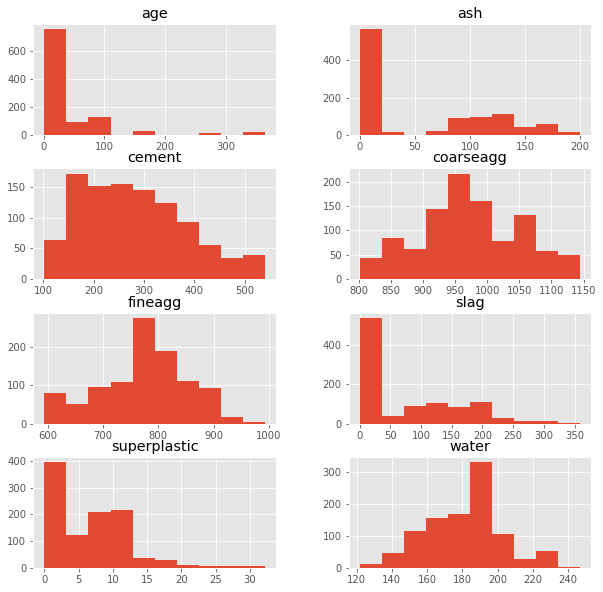

In [219]:
df_concrete.drop('strength',axis=1).hist(figsize=(10,10),layout=(4,2)); # Checking the distribution

### Observations
###### Attributes age, ash, slag and superplastic show high skewness
###### coarseagg, fineagg and water are follow kind of a normal distribution
###### cement is a little skewed but not highly

In [220]:
df_concrete.isnull().any()

cement          False
slag            False
ash             False
water           False
superplastic    False
coarseagg       False
fineagg         False
age             False
strength        False
dtype: bool

### Observation
##### No nulls in the dataset, null value imputation will not be required

## 2) Bivariate analysis

AxesSubplot(0.125,0.125;0.775x0.755)


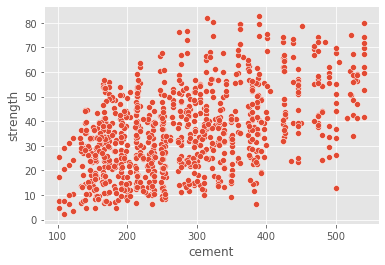

AxesSubplot(0.125,0.125;0.775x0.755)


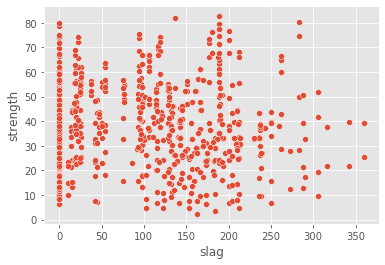

AxesSubplot(0.125,0.125;0.775x0.755)


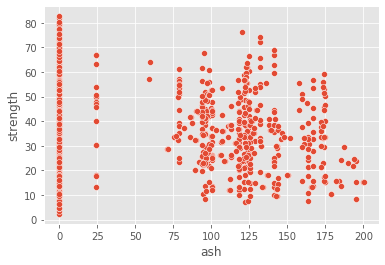

AxesSubplot(0.125,0.125;0.775x0.755)


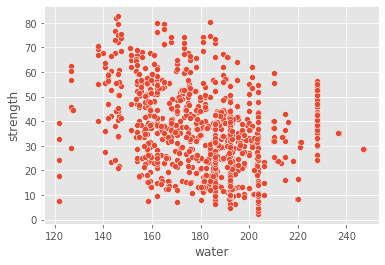

AxesSubplot(0.125,0.125;0.775x0.755)


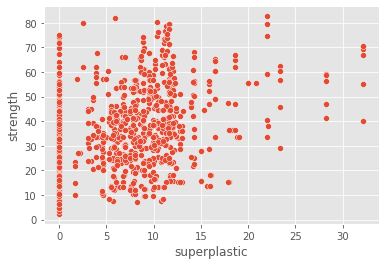

AxesSubplot(0.125,0.125;0.775x0.755)


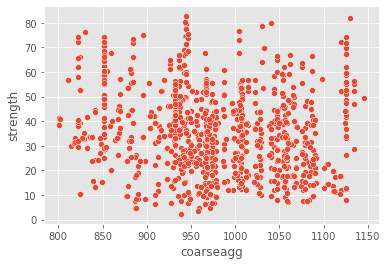

AxesSubplot(0.125,0.125;0.775x0.755)


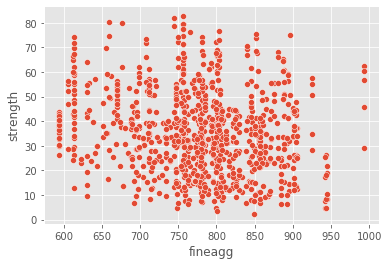

AxesSubplot(0.125,0.125;0.775x0.755)


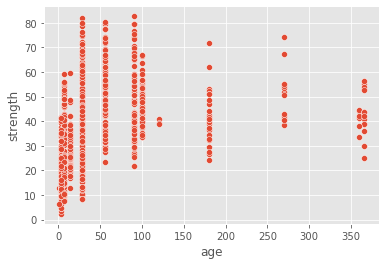

In [221]:
# Checking correlation between strength and the other independant attributes
for dim in df_concrete.columns[0:-1]:
    print(sns.scatterplot(df_concrete[dim], df_concrete['strength']));
    plt.show();

### Observation
##### Target variable strength has a definite positive correlation with Superplastic and Cement

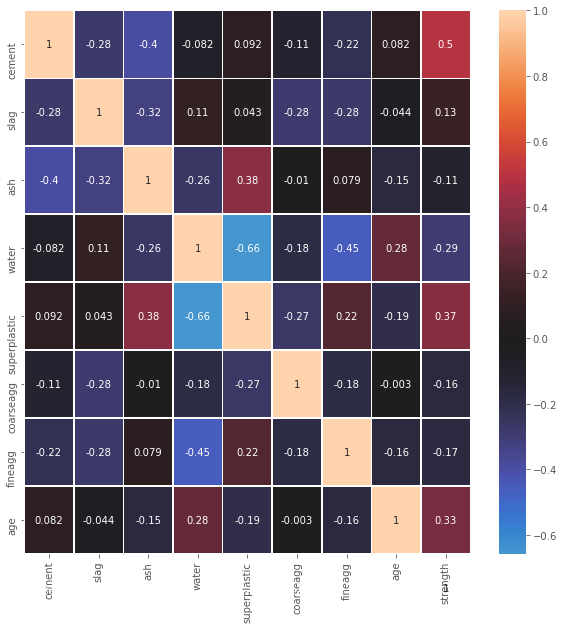

In [222]:
# Correlation HeatMap
plt.figure(figsize=(10,10))

ax_map = sns.heatmap(df_concrete.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=True)
ax_map.set_ylim(8.0, 0)

plt.show()

### Observation
##### Target variable strength has a definite positive correlation with Superplastic, Cement
##### Water has high negetive correlation between superplastic and fineagg

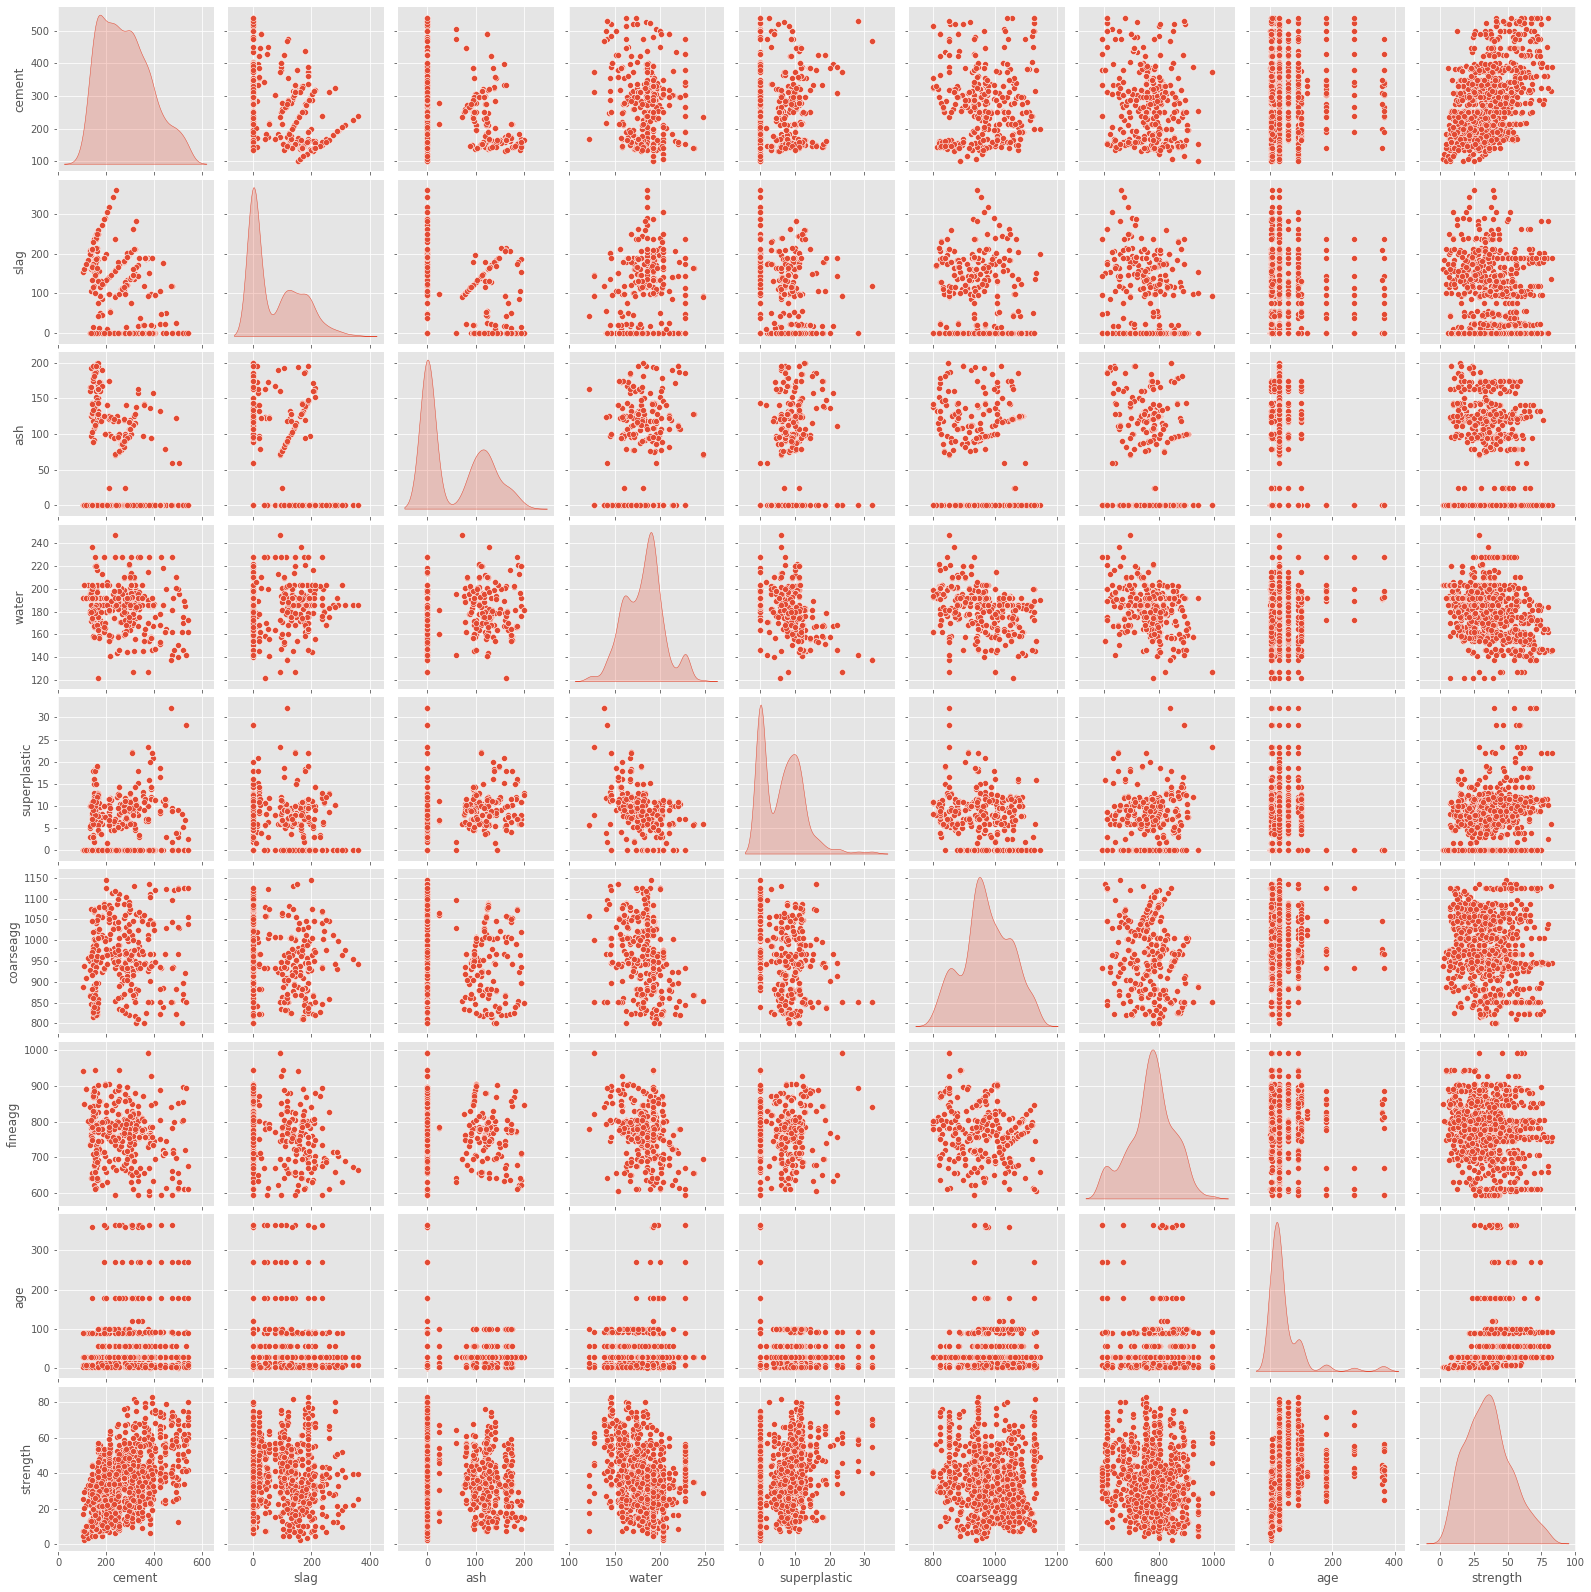

In [67]:
sns.pairplot(df_concrete, diag_kind="kde");

### Observation
##### Target variable strength has a definite positive correlation with Superplastic, Cement
##### Water has high negetive correlation between superplastic and fineagg

### Outlier Treatment - Strategy used is replacing the outliars with the medians

In [223]:
for column in df_concrete.columns.tolist():
    Q1 = df_concrete[column].quantile(.25)
    Q3 = df_concrete[column].quantile(.75)
    IQR = Q3-Q1
    df_concrete[column].replace(df_concrete.loc[(df_concrete[column] > Q3+1.5*IQR)|(df_concrete[column] < Q1-1.5*IQR), column], df_concrete[column].median(),inplace=True)

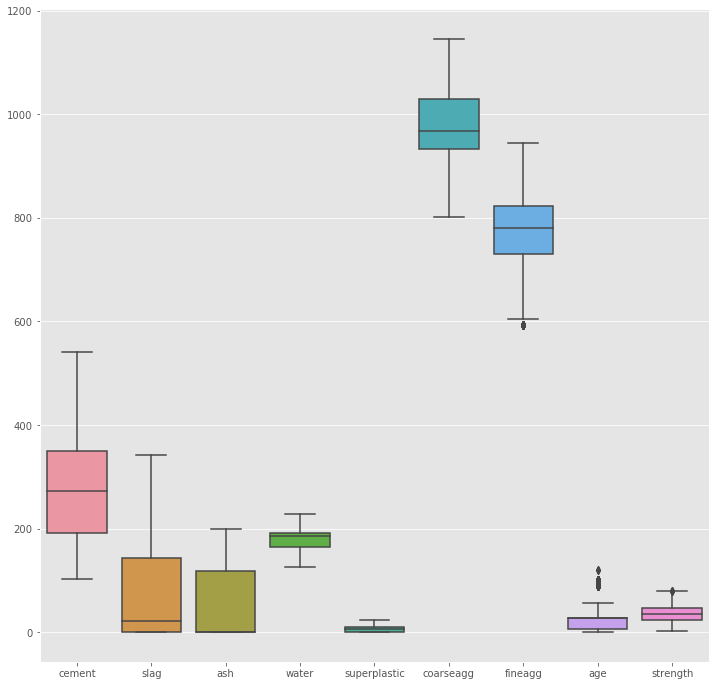

In [224]:
# Checking for Outliars again
plt.figure(figsize=(12,12))
box = sns.boxplot(data=df_concrete)
box.set_xticklabels(labels=box.get_xticklabels());

### Observation
###### New outliars have formed for age and fineagg, we will treat them later if required

### Identify opportunities (if any) to extract new features from existing features, drop a feature(if required) 

##### Adding feature water/cement ratio to the dataset
##### There is a non-linear relationship between water-cement ratio and concrete strenth. Smaller values of water-cement ratio (W/C) are associated with higher values of concrete strength where as higher values of ratio provide small concrete strength.

In [225]:
df_concrete.insert(4,'water/cement',df_concrete['water']/df_concrete['cement'])
df_concrete.head()

,cement,slag,ash,water,water/cement,superplastic,coarseagg,fineagg,age,strength
0,141.3000,212.0000,0.0000,203.5000,1.4402,0.0000,971.8000,748.5000,28,29.8900
1,168.9000,42.2000,124.3000,158.3000,0.9372,10.8000,"1,080.8000",796.2000,14,23.5100
2,250.0000,0.0000,95.7000,187.4000,0.7496,5.5000,956.9000,861.2000,28,29.2200
3,266.0000,114.0000,0.0000,228.0000,0.8571,0.0000,932.0000,670.0000,28,45.8500
4,154.8000,183.4000,0.0000,193.3000,1.2487,9.1000,"1,047.4000",696.7000,28,18.2900


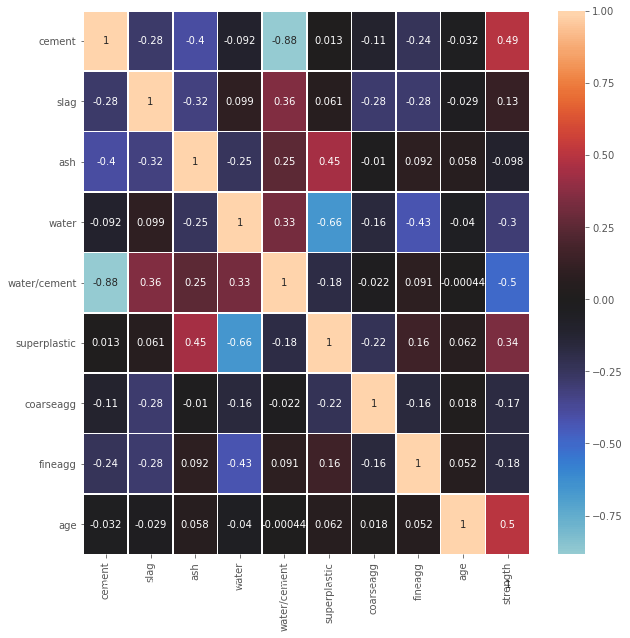

In [226]:
# Correlation HeatMap
plt.figure(figsize=(10,10))

ax_map = sns.heatmap(df_concrete.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=True)
ax_map.set_ylim(9.0, 0)

plt.show()

###### I am not dropping water or cement after introducing the new attribute, incase there is overfitting in the models 
###### I would consider omitting one of the attributes

### Spliting into train and test

In [227]:
features = [col for col in df_concrete.columns if col != 'strength']

X_train, X_test, y_train, y_test = train_test_split(df_concrete[features], df_concrete['strength'], test_size=.3, random_state=22)
X_train.shape, X_test.shape

((721, 9), (309, 9))

### Using Standard Scaler to scale the dataset between -1 and 1. Train and test have been scaled seperately to avoid data leakage

In [228]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

### Trying to identify the best model to apply on the dataset

### Applying Random Forest

In [229]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
print(f'Train Score is {rf.score(X_train, y_train)}')
print(f'Test Score is {rf.score(X_test, y_test)}')

Train Score is 0.9691527101363022
Test Score is 0.8982635769900026


##### Creating a dataframe to keep track of all scores from diff models

In [230]:
d = {"Regressor" :['RandomForestRegressor'], "TrainScore": [rf.score(X_train, y_train)], "TestScore": [rf.score(X_test, y_test)]}
df_scores = pd.DataFrame(data=d)

### Applying Bagging

In [231]:
bag = BaggingRegressor(random_state=42)
bag.fit(X_train, y_train)
print(f'Train Score is {bag.score(X_train, y_train)}')
print(f'Test Score is {bag.score(X_test, y_test)}')

Train Score is 0.9660241486815128
Test Score is 0.8832388258686462


In [232]:
d = {"Regressor" :'BaggingRegressor', "TrainScore": bag.score(X_train, y_train), "TestScore": bag.score(X_test, y_test)}
df_scores = df_scores.append(d, ignore_index = True)

### Applying AdaBoost

In [233]:
ada = AdaBoostRegressor(random_state=42)
ada.fit(X_train, y_train)
print(f'Train Score is {ada.score(X_train, y_train)}')
print(f'Test Score is {ada.score(X_test, y_test)}')

Train Score is 0.7713534854982327
Test Score is 0.7776021872671616


In [234]:
d = {"Regressor" :'AdaBoostRegressor', "TrainScore": ada.score(X_train, y_train), "TestScore": ada.score(X_test, y_test)}
df_scores = df_scores.append(d, ignore_index = True)

### Applying GradientBoosting

In [235]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
print(f'Train Score is {gbr.score(X_train, y_train)}')
print(f'Test Score is {gbr.score(X_test, y_test)}')

Train Score is 0.9397183135569923
Test Score is 0.8991448758691373


In [236]:
d = {"Regressor" :'GradientBoostRegressor', "TrainScore": gbr.score(X_train, y_train), "TestScore": gbr.score(X_test, y_test)}
df_scores = df_scores.append(d, ignore_index = True)

### Applying XGBoost

In [237]:
XGBR = XGBRegressor (random_state=42)
XGBR.fit(X_train, y_train)
print(f'Train Score is {XGBR.score(X_train, y_train)}')
print(f'Test Score is {XGBR.score(X_test, y_test)}')

Train Score is 0.9347188447505878
Test Score is 0.9014937531503876


In [238]:
d = {"Regressor" :'XGBoostRegressor', "TrainScore": XGBR.score(X_train, y_train), "TestScore": XGBR.score(X_test, y_test)}
df_scores = df_scores.append(d, ignore_index = True)

In [239]:
df_scores

,Regressor,TrainScore,TestScore
0,RandomForestRegressor,0.9692,0.8983
1,BaggingRegressor,0.9660,0.8832
2,AdaBoostRegressor,0.7714,0.7776
3,GradientBoostRegressor,0.9397,0.8991
4,XGBoostRegressor,0.9347,0.9015


### Observation: GradientBoostRegressor and XGBoost gives the best result in this case. Random forest is good but it tends to overfit the training Data.

### Applying hyperparameter tuning to Gradient Boost Regressor

In [263]:
# Defining parameters to tune
n_estimators = [100, 500, 900]
max_depth = [2, 3, 5, 10, 15]
min_samples_leaf = [1, 2, 4, 6, 8] 
min_samples_split = [2, 4, 6, 10]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split}

In [265]:
gradientboost = GradientBoostingRegressor()
random_cv = RandomizedSearchCV(estimator=gradientboost,
            param_distributions=hyperparameter_grid,
            cv=4, n_iter=50,
            n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [266]:
random_cv.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    9.4s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   17.1s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:   19.3s finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=4,
          param_distributions={'n_estimators': [100, 500, 900], 'max_depth': [2, 3, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 6, 8], 'min_samples_split': [2, 4, 6, 10]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring=None, verbose=5)

In [267]:
print(f'Tuned Train Score is {random_cv.score(X_train, y_train)}')
print(f'Tuned Test Score is {random_cv.score(X_test, y_test)}')

Tuned Train Score is 0.9850662372011272
Tuned Test Score is 0.9281482838941364


In [268]:
y_pred = random_cv.predict(X_test)
evs = explained_variance_score(y_pred, y_test)

In [269]:
r2 = r2_score(y_pred, y_test)

In [270]:
top2_scores = pd.DataFrame({'Regressor': ['Gradient Boost Regressor'], 'score': [random_cv.score(X_test, y_test)],
                            'explained_variance_score': [evs], 'r2_score': [r2]})

In [271]:
top2_scores

,Regressor,score,explained_variance_score,r2_score
0,Gradient Boost Regressor,0.9281,0.9201,0.9201


##### Applying Cross Validation to get a range of the score for Gradient Boost

In [277]:
scores = cross_val_score(random_cv, X_train, y_train, cv = 3)

print(f'Cross validation score of GradBoost = {scores.mean()}')
print(f'Range is between {scores.min()} and {scores.max()}')

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    6.9s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   12.5s
[Parallel(n_jobs=4)]: Done 193 out of 200 | elapsed:   14.1s remaining:    0.4s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:   14.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   11.5s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:   13.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    6.1s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   12.6s


Cross validation score of GradBoost = 0.8653035119308249
Range is between 0.852707634755782 and 0.8806836832260843


[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:   14.4s finished


### Score Ranges between 85.2 and 88 and the mean score is 87

### Applying hyperparameter tuning to XGBoost Regressor

In [244]:
XGB_grid = {"learning_rate"    : [0.05, 0.10, 0.15 ] ,
"n_estimators"     : [ 100, 200, 300 ],
"max_depth"        : [ 3, 4, 5, 6, 8, 10 ],
"min_child_weight" : [ 1, 3, 5, 7 ],
"gamma"            : [ 0.0, 0.1, 0.2 ],
"colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

In [278]:
XGBR = XGBRegressor ()
XGBR_tuned = RandomizedSearchCV(estimator = XGBR, param_distributions = XGB_grid, n_iter = 50, cv = 3, verbose=2, 
                               random_state=42, n_jobs = -1)

In [279]:
XGBR_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    3.5s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'learning_rate': [0.05, 0.1, 0.15], 'n_estimators': [100, 200, 300], 'max_depth': [3, 4, 5, 6, 8, 10], 'min_child_weight': [1, 3, 5, 7], 'gamma': [0.0, 0.1, 0.2], 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

##### Applying Cross Validation to get a range of the score for XGBoost

In [280]:
scores = cross_val_score(XGBR_tuned, X_train, y_train, cv = 3)

print(f'Cross validation score of XGBoost = {scores.mean()}')
print(f'Range is between {scores.min()} and {scores.max()}')

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Cross validation score of XGBoost = 0.8702717409155362
Range is between 0.8585835140996715 and 0.8763766474168752


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.1s finished


##### Score Ranges between 85.8 and 87.7 and the average is 87

In [272]:
y_pred = XGBR_tuned.predict(X_test)
evs = explained_variance_score(y_pred, y_test)

In [273]:
r2 = r2_score(y_pred, y_test)

In [275]:
d = {"Regressor" :'XGBoostRegressor', "score": XGBR_tuned.score(X_train, y_train), "explained_variance_score": evs, "r2_score": r2}
top2_scores = top2_scores.append(d, ignore_index = True)

In [276]:
top2_scores

,Regressor,score,explained_variance_score,r2_score
0,Gradient Boost Regressor,0.9281,0.9201,0.9201
1,XGBoostRegressor,0.9654,0.9059,0.9059


### Conclusion
##### Among the Models I have tried, I would use Gradient Boost Regressor as the model of choice. 
##### It gives a score, explained_variance_score and r2_score of about 92%